In [1]:
import scipy.stats
import scipy.special
from matplotlib import pyplot
import numpy

In [2]:
def log_poisson(n, x):
    return -x + scipy.special.xlogy(n, x) - scipy.special.loggamma(n + 1)
    
def log_poisson_test(n, x):
    return scipy.stats.poisson.logpmf(n, x)

print(log_poisson(0, 0.5), log_poisson_test(0, 0.5))
print(log_poisson(1, 0.5), log_poisson_test(1, 0.5))
print(log_poisson(1.01, 0.5), log_poisson_test(1.01, 0.5))

-0.5 -0.5
-1.1931471805599454 -1.1931471805599454
-1.204338675272643 -inf


In [3]:
def plot_r(n0, nplus, deltas, range_):
    x = numpy.linspace(*range_, 1001)
    
    def logl(n, x):
        parts = [
            log_poisson(n, x + delta)
            for delta in deltas
        ]
        
        # log mean exp
        return scipy.special.logsumexp(parts, axis=0) - numpy.log(len(deltas))
    
    pyplot.plot(x, logl(n0, x) - logl(n0, 0), "b")
    pyplot.plot(x, logl(n0 + nplus, x) - logl(n0 + nplus, 0), "r")
    
    pyplot.axhline(-3)
    
    pyplot.ylim(-6, 0.5)
    pyplot.show()

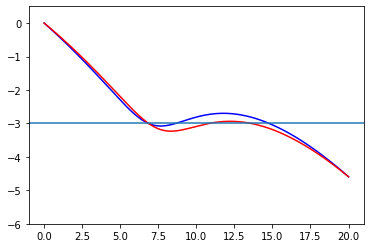

In [4]:
plot_r(
    12,
    0.5,
    [0] + [20] * 99,
    [0, 20],
)